In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np

In [7]:
file_url = '/content/drive/MyDrive/data_mining_project/data_encoded.csv'
data = pd.read_csv(file_url)

data

,Unnamed: 0,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,0,182707.0,4950,5,16.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,273250.0,8400,1,11.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,137528.0,7900,5,16.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4043.0,39900,5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,175144.0,9999,1,15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,6377,14910.0,20495,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6378,6378,3877.0,17899,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6379,6379,1300.0,21600,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6380,6380,30220.0,23910,4,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,182707.0,4950,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,273250.0,8400,1,11.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137528.0,7900,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4043.0,39900,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175144.0,9999,1,15.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,14910.0,20495,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6378,3877.0,17899,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6379,1300.0,21600,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6380,30220.0,23910,4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.columns

Index(['Mileage', 'Price', 'Fuel Type', 'Car Age', 'Brand_alfa romeo',
       'Brand_audi', 'Brand_bmw', 'Brand_chevrolet', 'Brand_citroen',
       'Brand_dacia',
       ...
       'Model_xceed', 'Model_xsara picasso', 'Model_yaris',
       'Model_yaris cross', 'Model_yeti', 'Model_z4', 'Model_zafira',
       'Model_zafira tourer', 'Model_zoe', 'Model_zr-v'],
      dtype='object', length=614)

In [11]:
data = data[data['Brand_audi'] == 1.0]

In [12]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,182707.0,4950,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,273250.0,8400,1,11.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137528.0,7900,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4043.0,39900,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175144.0,9999,1,15.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,118741.0,19900,1,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,71000.0,35300,5,6.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,11900.0,29550,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,113094.0,11949,5,13.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mileage_scaler = MinMaxScaler()
data['Mileage'] = mileage_scaler.fit_transform(data[['Mileage']])


price_scaler = MinMaxScaler()
data['Price'] = price_scaler.fit_transform(data[['Price']])


year_scaler = MinMaxScaler()
data['Car Age'] = year_scaler.fit_transform(data[['Car Age']])


fuel_scaler = MinMaxScaler()
data['Fuel Type'] = fuel_scaler.fit_transform(data[['Fuel Type']])

<ipython-input-13-b094eb0c85fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage'] = mileage_scaler.fit_transform(data[['Mileage']])
<ipython-input-13-b094eb0c85fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = price_scaler.fit_transform(data[['Price']])
<ipython-input-13-b094eb0c85fe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [14]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,0.284516,0.032966,1.0,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.428703,0.065742,0.2,0.423077,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.212570,0.060992,1.0,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.365001,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272472,0.080933,0.2,0.576923,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.182653,0.174995,0.2,0.153846,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.106627,0.321300,1.0,0.230769,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.012512,0.266673,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,0.173660,0.099458,1.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data['Fuel Type'].unique()

array([1. , 0.2, 0.8, 0.4, 0.6, 0. ])

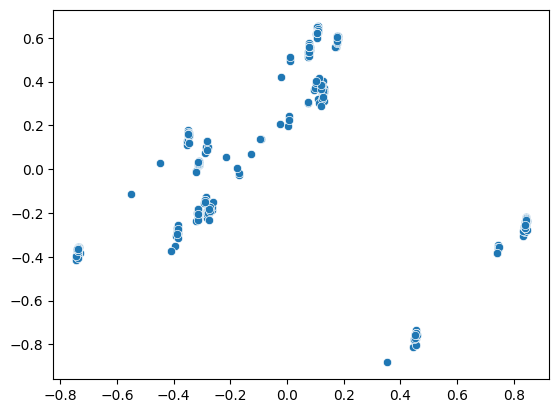

In [16]:
pca = PCA(n_components=2)
data_pca = pca.fit(data).transform(data)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1])
plt.show()

### K-means clustering

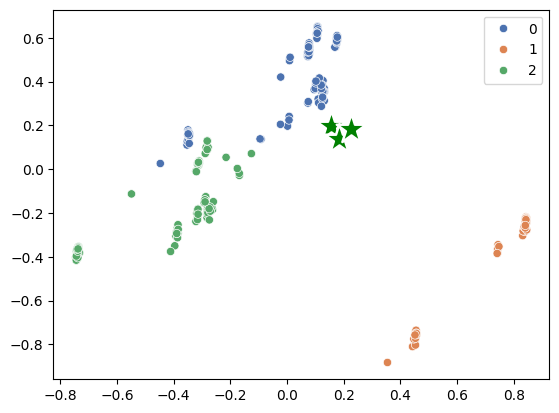

In [17]:
k_means = KMeans(n_clusters=3,  n_init=10, random_state=42)
k_means.fit(data)
labels = k_means.labels_
centroids = k_means.cluster_centers_
pd.DataFrame(centroids)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels, palette='deep')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="g", s=500)
plt.show()

In [18]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,0.284516,0.032966,1.0,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.428703,0.065742,0.2,0.423077,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.212570,0.060992,1.0,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.365001,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272472,0.080933,0.2,0.576923,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.182653,0.174995,0.2,0.153846,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.106627,0.321300,1.0,0.230769,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.012512,0.266673,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,0.173660,0.099458,1.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


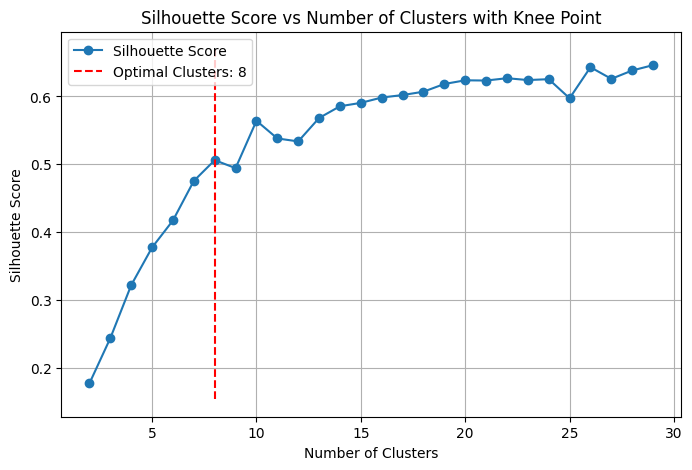

Optimal number of clusters according to the knee method: 8


In [19]:
silhouette_scores = []
for num_clusters in range(2, 30):
    k_means = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    k_means.fit(data)

    labels = k_means.labels_
    centroids = k_means.cluster_centers_

    score = silhouette_score(data, labels)
    silhouette_scores.append(score)


cluster_range = range(2, 30)
knee_locator = KneeLocator(cluster_range, silhouette_scores, curve='concave', direction='increasing')
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='r', label=f'Optimal Clusters: {knee_locator.knee}')
plt.title('Silhouette Score vs Number of Clusters with Knee Point')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

print(f"Optimal number of clusters according to the knee method: {knee_locator.knee}")

### DBSCAN (Density-based clustering)

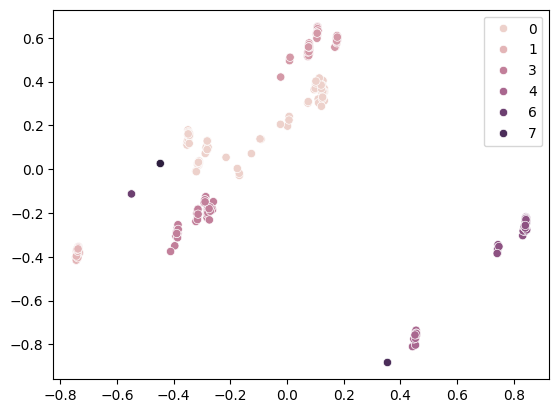

In [20]:
db = DBSCAN(eps=0.1, min_samples=1).fit(data_pca)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=db.labels_)
plt.show()

In [21]:
labels = db.labels_
score = silhouette_score(data_pca, labels)
print(score)

0.46036249071705637


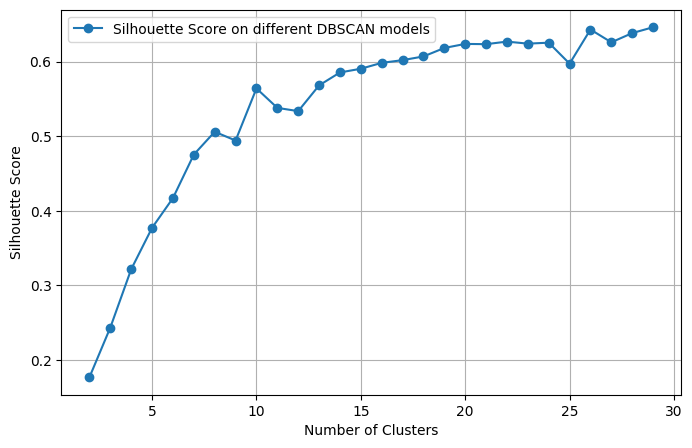

In [24]:
sil_scores = []
eps_values = np.linspace(0.01, 1.0, 50)

for eps in eps_values:
  db = DBSCAN(eps=eps, min_samples=1).fit(data_pca)
  sil_scores.append(silhouette_score(data_pca, labels))

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score on different DBSCAN models')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

After the previous example with K-means model and DBSCAN model both of the experiments are showing us that the optimal number of clusters is around 6.
